# A/B test   

[Ref](https://www.analyticsvidhya.com/blog/2020/10/ab-testing-data-science/)  
In this section, we demonstrate how to use python to conduct simple A/B test. Here we will run a two-sample t-test on a dummy data having an experiment result of an A/B testing for 30 days.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from urllib.request import Request, urlopen

# First we query the data
url = "https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/data.csv"
req = Request(url)
req.add_header("User-Agent", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0")
content = urlopen(req)
df = pd.read_csv(content)
df.head(10)

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19
5,6,0.13,0.17
6,7,0.14,0.18
7,8,0.23,0.20
8,9,0.11,0.17
9,10,0.15,0.22


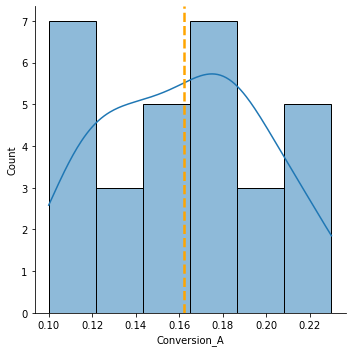

In [2]:
sns.displot(df.Conversion_A, kde=True)
plt.axvline(df.Conversion_A.mean(), c="orange", ls="--", lw=2.5)

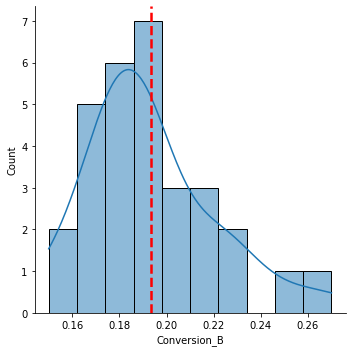

In [3]:
sns.displot(df.Conversion_B, kde=True)
plt.axvline(df.Conversion_B.mean(), c="red", ls="--", lw=2.5)

## Statistical analysis (T-test)  
We use t-test to compute if the result is significant or not. (provide scenario using T-test)

In [4]:
# perform t-test
t_stat, p_val = ss.ttest_ind(df.Conversion_B, df.Conversion_A)
t_stat, p_val, df.Conversion_A.mean(), df.Conversion_B.mean()

(3.78736793091929, 0.000363796012828762, 0.162, 0.19333333333333336)

### Conclusion  
From our result, the mean of control group is around 0.16 and the treatment group is around 0.19. Statistical result of the t-score is **3.787** and the p-value is **0.000364**. Since p-value is less than 0.05, we can say the treatment group is better than the control group significantly. So the recommendation would be to replace A with B.  

:::{note}
When Should We Use A/B Testing?
A/B testing works best when testing incremental changes, such as UX changes, new features, ranking, and page load times. Here you may compare pre and post-modification results to decide whether the changes are working as desired or not.

A/B testing doesn’t work well when testing major changes, like new products, new branding, or completely new user experiences. In these cases, there may be effects that drive higher than normal engagement or emotional responses that may cause users to behave in a different manner.
:::